In [43]:
from typing import TypedDict
from langgraph.graph import StateGraph ,START,END

In [44]:
class AgentState (TypedDict) :
    num1 : int 
    num2 : int
    operation : str
    final : int 

In [ ]:
def add(state :AgentState ) -> AgentState :
    state['final'] = state ['num1'] + state ['num2']
    return state

def subtract (state :AgentState ) -> AgentState :
    state['final'] = state['num1']- state['num2']
    return state

def add_conditonal_node (state :AgentState) ->str:
    """This switches between the nodes"""
    if state['operation']=='+':
        return "addition"
    elif state['operation'] == '-':
        return "subtraction"
    


In [46]:
graph = StateGraph (AgentState)
graph.add_node ("Adder", add)
graph.add_node ('subtractor',subtract)
graph.add_node ('Router',lambda state : state)

graph.add_edge(START,'Router')
graph.add_conditional_edges(
    'Router',
    add_conditonal_node,
    {
        # Edge :Node
        'addition':'Adder',
        'subtraction' : 'subtractor'
    }
)

graph.add_edge('Adder',END)
graph.add_edge ('subtractor',END )

model=graph.compile()

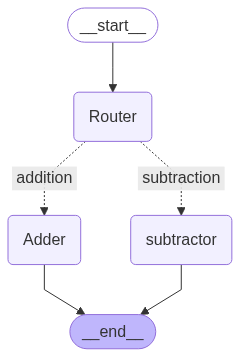

In [48]:
from IPython.display import Image,display
display(Image(model.get_graph().draw_mermaid_png()))

In [47]:
rslt=model.invoke({'num1':10 ,'num2' :5 , 'operation':'-'})
print(rslt)

{'num1': 10, 'num2': 5, 'operation': '-', 'final': 5}
